In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
import joblib

In [8]:
df = pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
list(df)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [10]:
df.shape

(303, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### 1 Represents a Defective Heart
### 0 Represents a Healthy Heart

<Axes: xlabel='target', ylabel='count'>

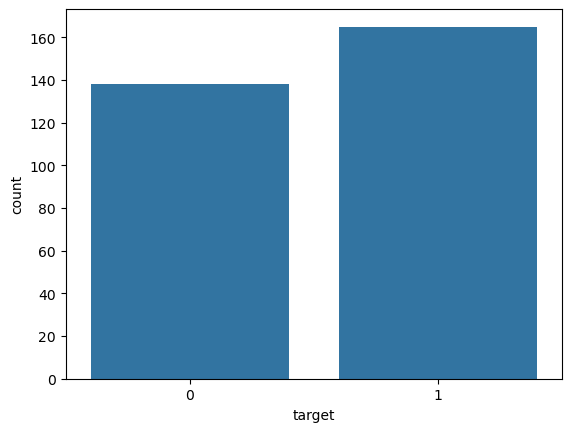

In [15]:
sns.countplot(x=df["target"])

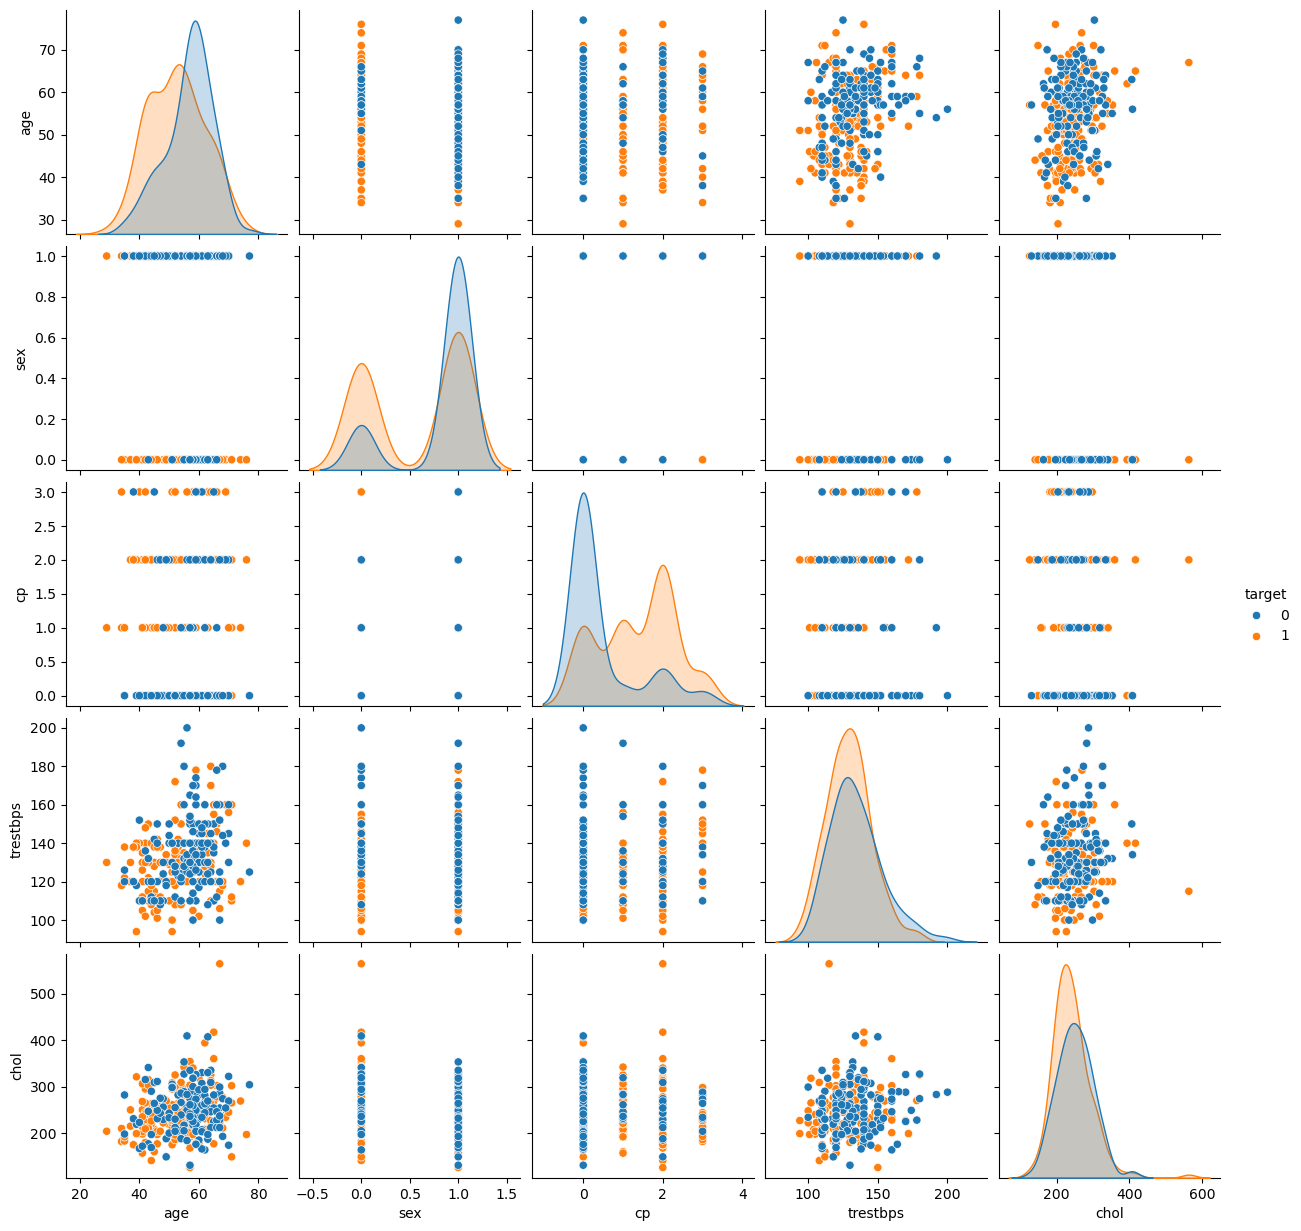

In [16]:
sns.pairplot(df, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])

<Axes: >

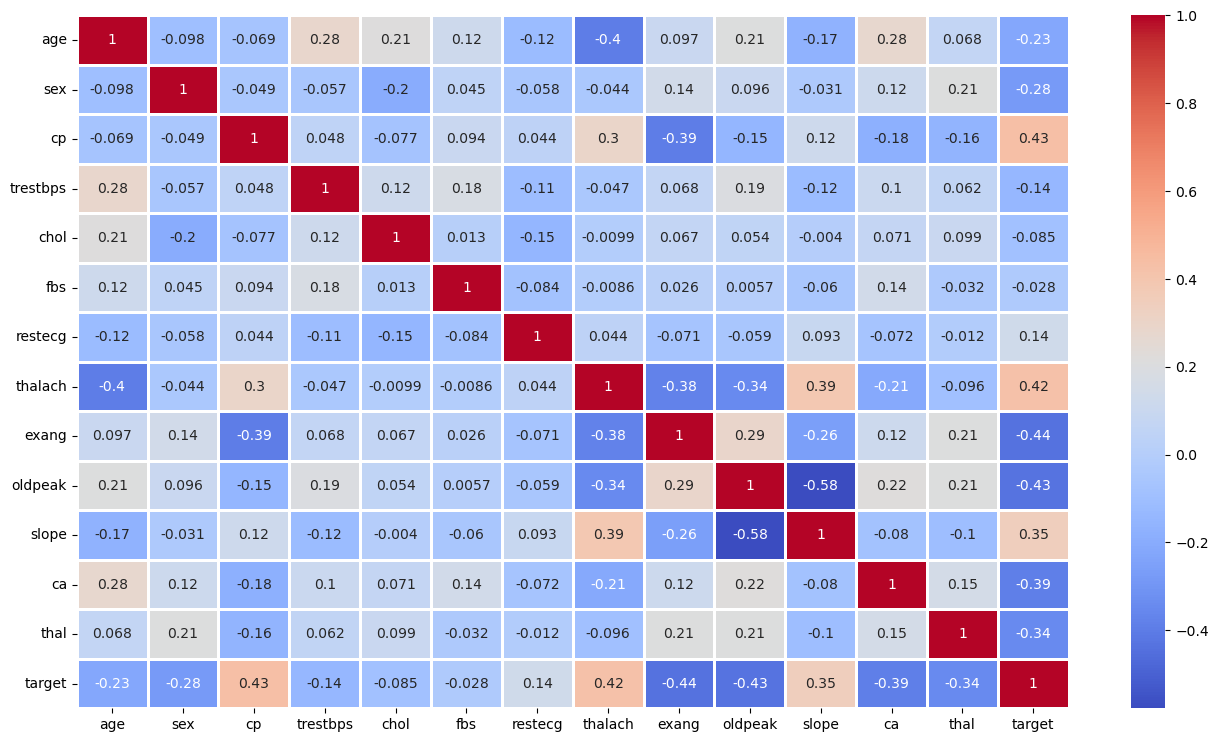

In [17]:
plt.figure(figsize= (16,9))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', linewidths = 2)

In [18]:
X = df.drop(columns = 'target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y = df['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### [0] : means patient has a healthy heart 💛💛💛💛
### [1] : means patient has a unhealthy heart 💔💔💔💔
  

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X)
X_standard = scaler.transform(X)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (257, 13) (46, 13)


### Logistic Regression

In [26]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [27]:
y_pred = lr.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7826


### Naive Bayes Classifier

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [30]:
y_pred = gnb.predict(X_test)
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8478


### K-Nearest Neighbor (KNN)

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred = knn.predict(X_test)
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6522


### Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dtc.predict(X_test)
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7609


### Support Vector Machine (Linear)

In [38]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [39]:
y_pred = svm.predict(X_test)
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8043


### Multi-model training

In [41]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) 
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') 

In [42]:
rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  
abc = AdaBoostClassifier(algorithm='SAMME',n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [43]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [44]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [45]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

Model name :  Support Vector Classifier
Accuracy :  0.5434782608695652
Precision :  0.5434782608695652
Confusin Matrix :  [[ 0 21]
 [ 0 25]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.6739130434782609
Precision :  0.7083333333333334
Confusin Matrix :  [[14  7]
 [ 8 17]] 

Model name :  Multinomial NB
Accuracy :  0.717391304347826
Precision :  0.8
Confusin Matrix :  [[17  4]
 [ 9 16]] 

Model name :  Decision Tree Classifier
Accuracy :  0.717391304347826
Precision :  0.7307692307692307
Confusin Matrix :  [[14  7]
 [ 6 19]] 

Model name :  Logistic Regression
Accuracy :  0.8260869565217391
Precision :  0.84
Confusin Matrix :  [[17  4]
 [ 4 21]] 

Model name :  Random Forest Classifier
Accuracy :  0.7608695652173914
Precision :  0.7916666666666666
Confusin Matrix :  [[16  5]
 [ 6 19]] 

Model name :  AdaBoost Classifier
Accuracy :  0.782608695652174
Precision :  0.7777777777777778
Confusin Matrix :  [[15  6]
 [ 4 21]] 

Model name :  Bagging Classifier
Accuracy :  0.804347826086

In [46]:
result_df = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)
result_df

,Algorithm,Accuracy,Precision
8,Extra Trees Classifier,0.847826,0.875000
9,Gradient Boosting Classifier,0.847826,0.846154
4,Logistic Regression,0.826087,0.840000
7,Bagging Classifier,0.804348,0.807692
2,Multinomial NB,0.717391,0.800000
5,Random Forest Classifier,0.760870,0.791667
6,AdaBoost Classifier,0.782609,0.777778
10,XGB Classifier,0.782609,0.777778
3,Decision Tree Classifier,0.717391,0.730769
1,K-Neighbors Classifier,0.673913,0.708333


### Improving the Model

In [48]:
rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [49]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('bc', bc), ('et', etc), ('xgb', xgb)],voting='soft')
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=No...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [50]:
y_pred = voting.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.8260869565217391
[[16  5]
 [ 3 22]]
0.8148148148148148


### Evaluating the Model

In [52]:
X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  1.0


In [53]:
X_test_prediction = voting.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of testing data:", testing_data_accuracy)

The accuracy of testing data: 0.8260869565217391


In [54]:
Y_pred = voting.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 0.8260869565217391
Precision  : 0.8148148148148148
Recall     : 0.88
F1-score   : 0.8461538461538461


In [55]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.81      0.88      0.85        25

    accuracy                           0.83        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



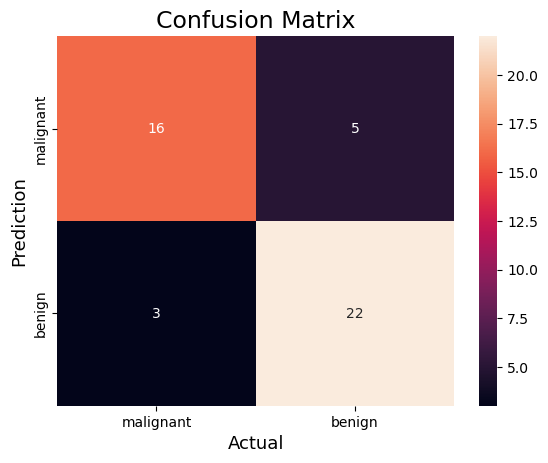

In [56]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Building Prediction system

In [58]:
input_data = (60,0,2,102,318,0,1,160,0,0,2,1,2)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
input_data_df = pd.DataFrame([input_data], columns=feature_names)

In [59]:
prediction = voting.predict(input_data_df)
print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart 💛💛💛💛")

else:
    print("Patient has a heart Disease 💔💔💔💔")

[1]
Patient has a heart Disease 💔💔💔💔


### Saving the Model

In [61]:
import pickle

filename = "model.pkl"
pickle.dump(voting, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open("model.pkl",'rb'))

In [63]:
# save the model to disk
filename = 'heart_disease_model.sav'
joblib.dump(voting, filename)

['heart_disease_model.sav']